In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_dir = '../data'

transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [5]:
train_dataset = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)

print('train size:', len(train_dataset))
print('test size:', len(test_dataset))

x0, y0 = train_dataset[0]
print('single sample shape:', x0.shape)
print('single label:', y0)
print('dtype/min/max:', x0.dtype, float(x0.min()), float(x0.max()))

train size: 60000
test size: 10000
single sample shape: torch.Size([1, 32, 32])
single label: 5
dtype/min/max: torch.float32 -0.4242129623889923 2.821486711502075


In [7]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=0)
test_loader  = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=0)

xb, yb = next(iter(train_loader))
print("batch x shape:", xb.shape)  # 期望 [128, 1, 32, 32]
print("batch y shape:", yb.shape)  # 期望 [128]
print("labels example:", yb[:10].tolist())


batch x shape: torch.Size([128, 1, 32, 32])
batch y shape: torch.Size([128])
labels example: [9, 7, 3, 9, 7, 5, 0, 8, 0, 6]


Matplotlib is building the font cache; this may take a moment.


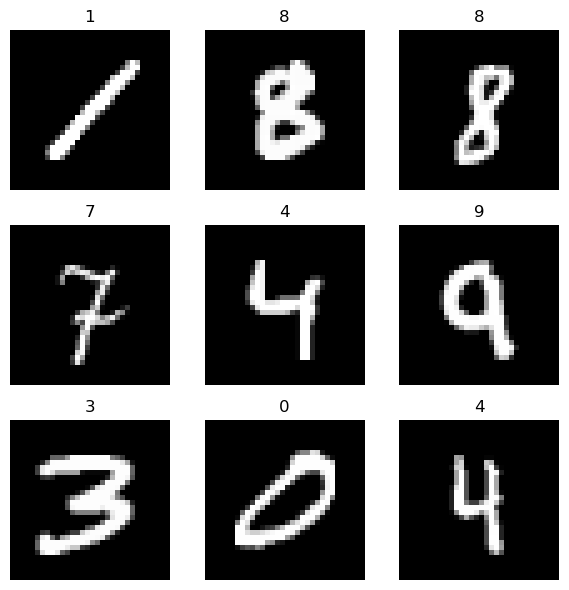

In [8]:
import matplotlib.pyplot as plt

xb, yb = next(iter(train_loader))

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = xb[i, 0].cpu()
    plt.imshow(img, cmap="gray")
    plt.title(int(yb[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()
